# Spring-Mass-Damper System

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Phase portraits
    - Spring-mass-damper system

## Spring-mass-damper system
Consider a horizontal spring-mass-damper system. We have the following laws

$$
\begin{aligned}
&\text{Newton's second law: } &\sum F &= ma \\
&\text{Hook's law of spring: } &F_{\text{spring}} &= -kx \\
&\text{Damping force: } &F_{\text{damper}} &= -cv \\
\end{aligned}
$$

Without external forces, we have the following ODE:

$$
\begin{aligned}
ma + cv + kx &= 0 \\
m\ddot{x} - c\dot{x} + kx &= 0
\end{aligned}
$$

Isolate the second derivative, we have

$$
\boxed{\ddot{x} = -\dfrac{k}{m}x - \dfrac{c}{m}\dot{x}}
$$

that can be written as a system of first-order ODEs

$$
\begin{cases}
\dot{x} = v \\
\dot{v} = -\dfrac{k}{m}x - \dfrac{c}{m}v
\end{cases}
$$

**Problem Statement.** With the initial conditions of $x(0) = 3 \ \mathrm{m}$ and $v(0) = 1 \ \mathrm{m/s}$, explore the phase portraits of the system with the following parameters:

|Model|$m$ [kg]|$k$ [N/m]|$c$ [kg/s]|
|-:|-:|-:|-:|
|Base case|3|3|1|
|1-1|3|3|0|
|1-2|3|3|0.1|
|1-3|3|3|1|
|2-1|3|1|0.1|
|2-2|3|3|0.1|
|2-3|3|9|0.1|
|3-1|1|3|0.1|
|3-2|3|3|0.1|
|3-3|9|3|0.1|

in $t \in [0, 50] \ \mathrm{s}$ with $\Delta t = 0.1 \ \mathrm{s}$

### Base case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [2]:
# physical params
m = 3
k = 3
c = 1

In [3]:
# initial conditions
x0 = 3
v0 = 1
initial_val = [x0, v0]

In [4]:
# time array
t_initial = 0
t_final = 200
dt = 0.1
t = np.arange(t_initial, t_final+dt/2, dt)

In [5]:
# governing ode system
dxdt = lambda x, v : v
dvdt = lambda x, v : -k/m*x - c/m*v
ode_func = lambda t, z : np.array([dxdt(*z), dvdt(*z)])

In [6]:
ode_soln = scipy.integrate.solve_ivp(ode_func, [t_initial, t_final], initial_val, t_eval=t)

In [7]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

In [8]:
# quiver grid
xvec = np.linspace(-5, 5, 20)
vvec = np.linspace(-5, 5, 20)
X, V = np.meshgrid(xvec, vvec)

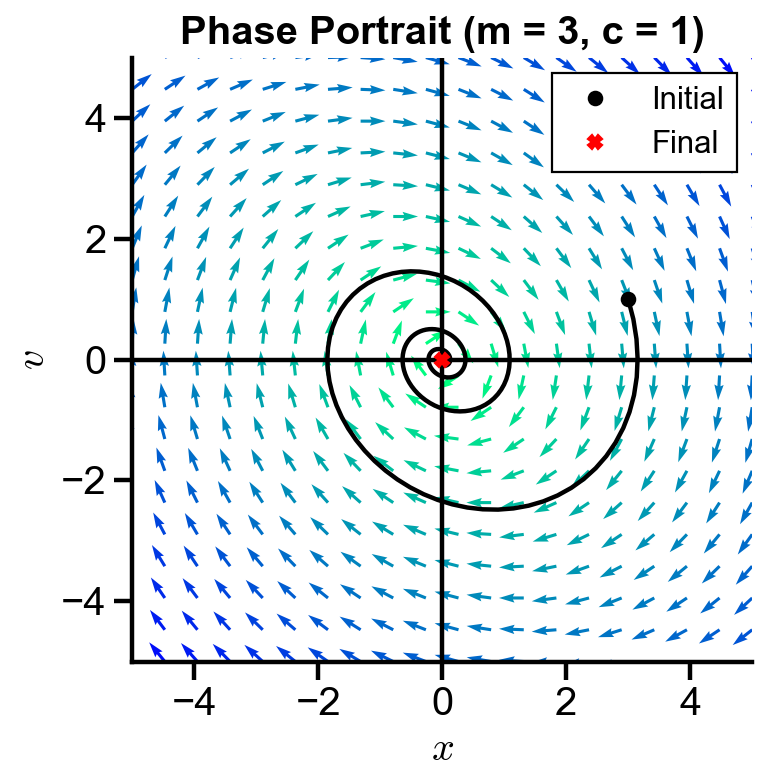

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
# plot phase portrait
scale = np.sqrt(dxdt(X, V)**2 + dvdt(X, V)**2)
ax.quiver(X, V, dxdt(X, V)/scale, dvdt(X, V)/scale, scale, cmap='winter_r', scale=25, width=0.005)
ax.plot(*initial_val, 'o', color='black', label='Initial')
ax.plot(ode_soln.y[0], ode_soln.y[1], color='black')
ax.plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')

# plot setting
ax.plot([-5, 5], [0, 0], color='black')
ax.plot([0, 0], [-5, 5], color='black')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('$x$')
ax.set_ylabel('$v$')
ax.set_title(f'Phase Portrait (m = {m}, c = {c})')
ax.legend(loc='upper right')

▲ The slope fields spirals into the origin, so the system will be at equilibrium position with zero velocity over time for $m = 3, c = 1$.

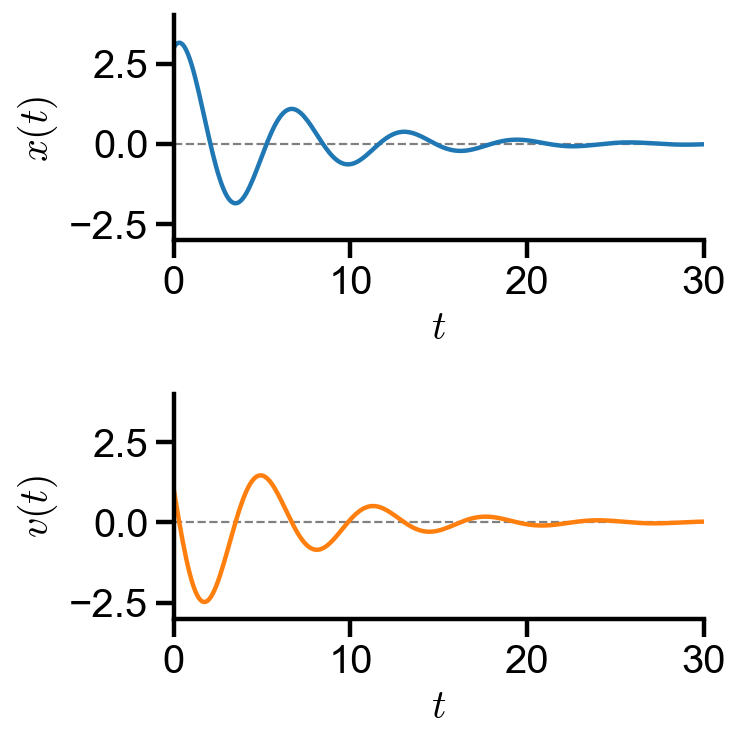

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5))
axs[0].plot(t, ode_soln.y[0], color='tab:blue', label='$x(t)$')
axs[1].plot(t, ode_soln.y[1], color='tab:orange', label='$v(t)$')
axs[0].set_ylabel('$x(t)$')
axs[1].set_ylabel('$v(t)$')

for i in range(2):
    axs[i].plot([0, 30], [0, 0], '--', color='grey', lw=1, zorder=0)
    # # plot settings
    axs[i].set_xlim(0, 30)
    axs[i].set_ylim(-3, 4)
    axs[i].set_xlabel('$t$')
plt.tight_layout()

### Changing damping constant $c$

In [11]:
# physical params
m = 3
k = 3
c = np.array([0, 0.1, 1])

In [12]:
# initial conditions
x0 = 3
v0 = 1
initial_val = [x0, v0]

In [13]:
# time array
t_initial = 0
t_final = 50
dt = 0.1
t = np.arange(t_initial, t_final, dt)

In [14]:
# quiver grid
xvec = np.linspace(-5, 5, 20)
vvec = np.linspace(-5, 5, 20)
X, V = np.meshgrid(xvec, vvec)

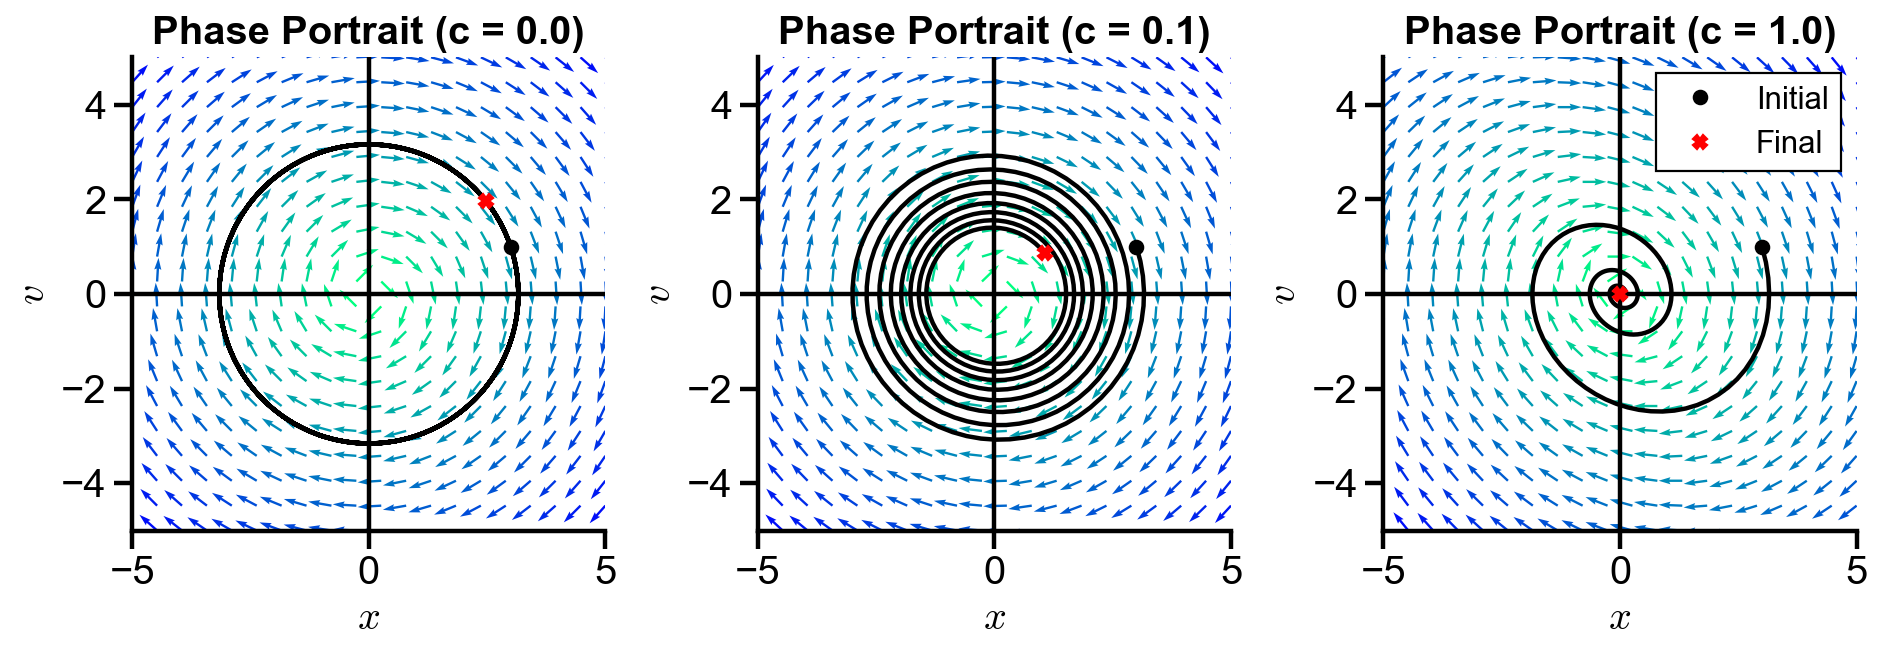

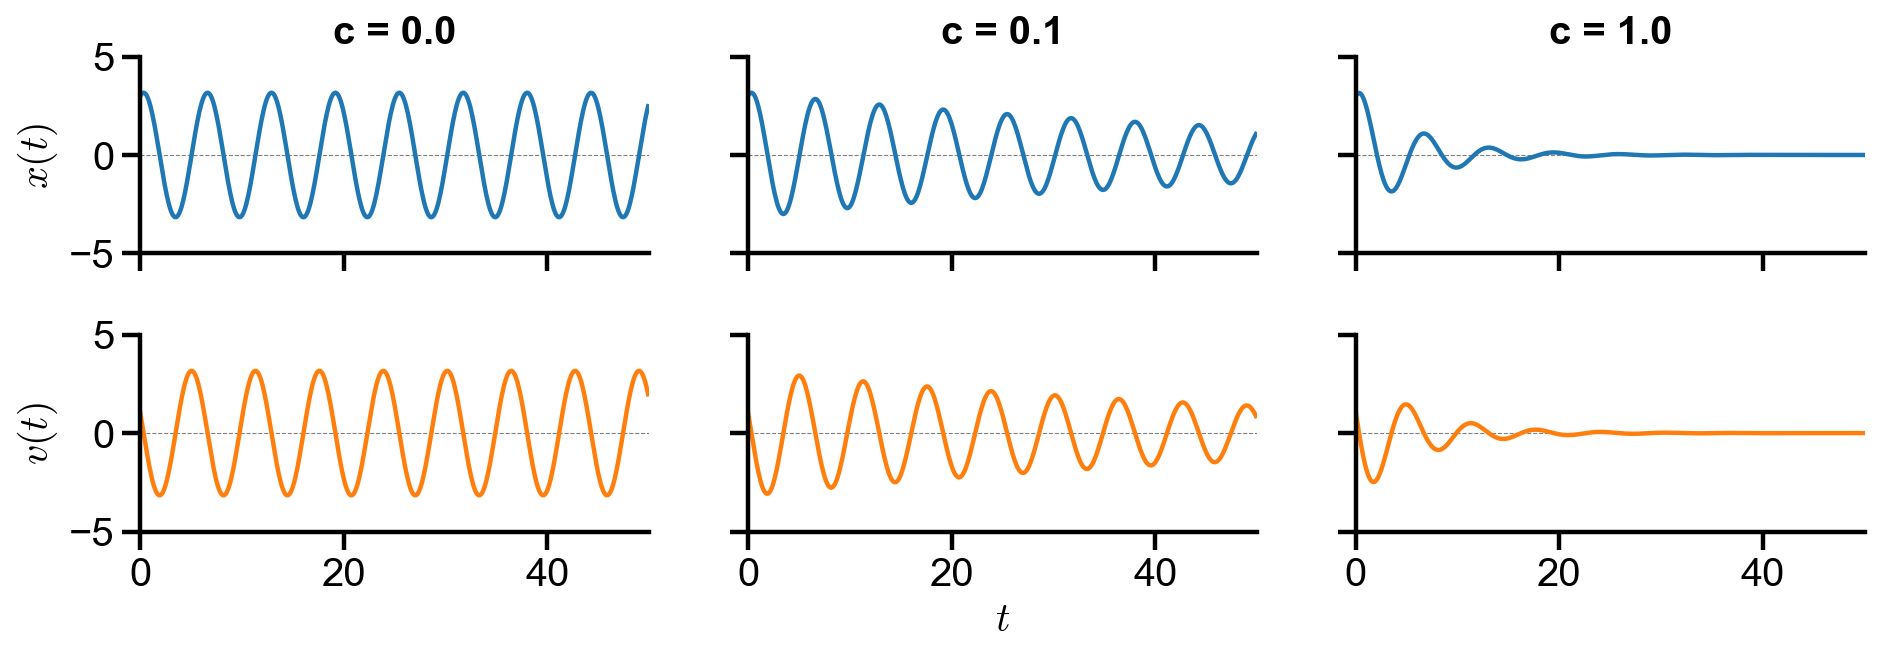

In [15]:
fig1, axs1 = plt.subplots(1, 3, figsize=(12, 4))
plt.tight_layout()
fig2, axs2 = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
plt.tight_layout()

for i in range(len(c)):
    # governing ode system
    dxdt = lambda x, v : v
    dvdt = lambda x, v : -k/m*x - c[i]/m*v
    ode_func = lambda t, z : np.array([dxdt(*z), dvdt(*z)])
    # ode soln
    ode_soln = scipy.integrate.solve_ivp(ode_func, [t_initial, t_final], initial_val, t_eval=t)
    # plot phase portrait
    scale = np.sqrt(dxdt(X, V)**2 + dvdt(X, V)**2)
    axs1[i].quiver(X, V, dxdt(X, V)/scale, dvdt(X, V)/scale, scale, cmap='winter_r', scale=20, width=0.005)
    axs1[i].plot(*initial_val, 'o', color='black', label='Initial')
    axs1[i].plot(ode_soln.y[0], ode_soln.y[1], color='black')
    axs1[i].plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
    # plot settings
    axs1[i].plot([-5, 5], [0, 0], color='black')
    axs1[i].plot([0, 0], [-5, 5], color='black')
    axs1[i].set_xlim(-5, 5)
    axs1[i].set_ylim(-5, 5)
    axs1[i].set_xlabel('$x$')
    axs1[i].set_ylabel('$v$')
    axs1[i].set_title(f'Phase Portrait (c = {c[i]})')
    axs1[i].set_aspect(1.0/axs1[i].get_data_ratio())  # square aspect
    # plot pver time
    axs2[0, i].plot(t, ode_soln.y[0], label='$x(t)$')
    axs2[1, i].plot(t, ode_soln.y[1], color='tab:orange', label='$v(t)$')
    axs2[1, 1].set_xlabel('$t$')
    axs2[0, 0].set_ylabel('$x(t)$')
    axs2[1, 0].set_ylabel('$v(t)$')
    axs2[0, i].set_title(f'c = {c[i]}')
    # plot settings
    for j in range(2):
        axs2[j, i].plot([0, 50], [0, 0], '--', color='grey', lw=0.5, zorder=0)
        # # plot settings
        axs2[j, i].set_xlim(0, 50)
        axs2[j, i].set_ylim(-5, 5)
        
axs1[-1].legend(loc='upper right')

▲ The figure above shows the behavior of the system with changing damping constant $c$.

$c = 0$ - The trajectory forms a close loop, so the system will oscillate forever. The position and velocity oscillates sinusoidally without damping.

$c = 0.1$ - The slope field spirals into the origin, so the system will be at equilibrium position with zero velocity over time. However, because of the small damping constant, the system is oscillating at final time. The position and velocity oscillates sinusoidally without small damping.

$c = 1$ - Similar to $c = 0.1$, the slope field spirals into the origin. Because of the large damping constant, the position and velocity oscillates sinusoidally with large damping, and the system is already at rest at final time.

### Changing spring constant $k$

In [16]:
# physical params
m = 3
k = np.array([1, 3, 9])
c = 0.1

In [17]:
# initial conditions
x0 = 3
v0 = 1
initial_val = [x0, v0]

In [18]:
# time array
t_initial = 0
t_final = 50
dt = 0.1
t = np.arange(t_initial, t_final, dt)

In [19]:
# quiver grid
xvec = np.linspace(-5, 5, 20)
vvec = np.linspace(-5, 5, 20)
X, V = np.meshgrid(xvec, vvec)

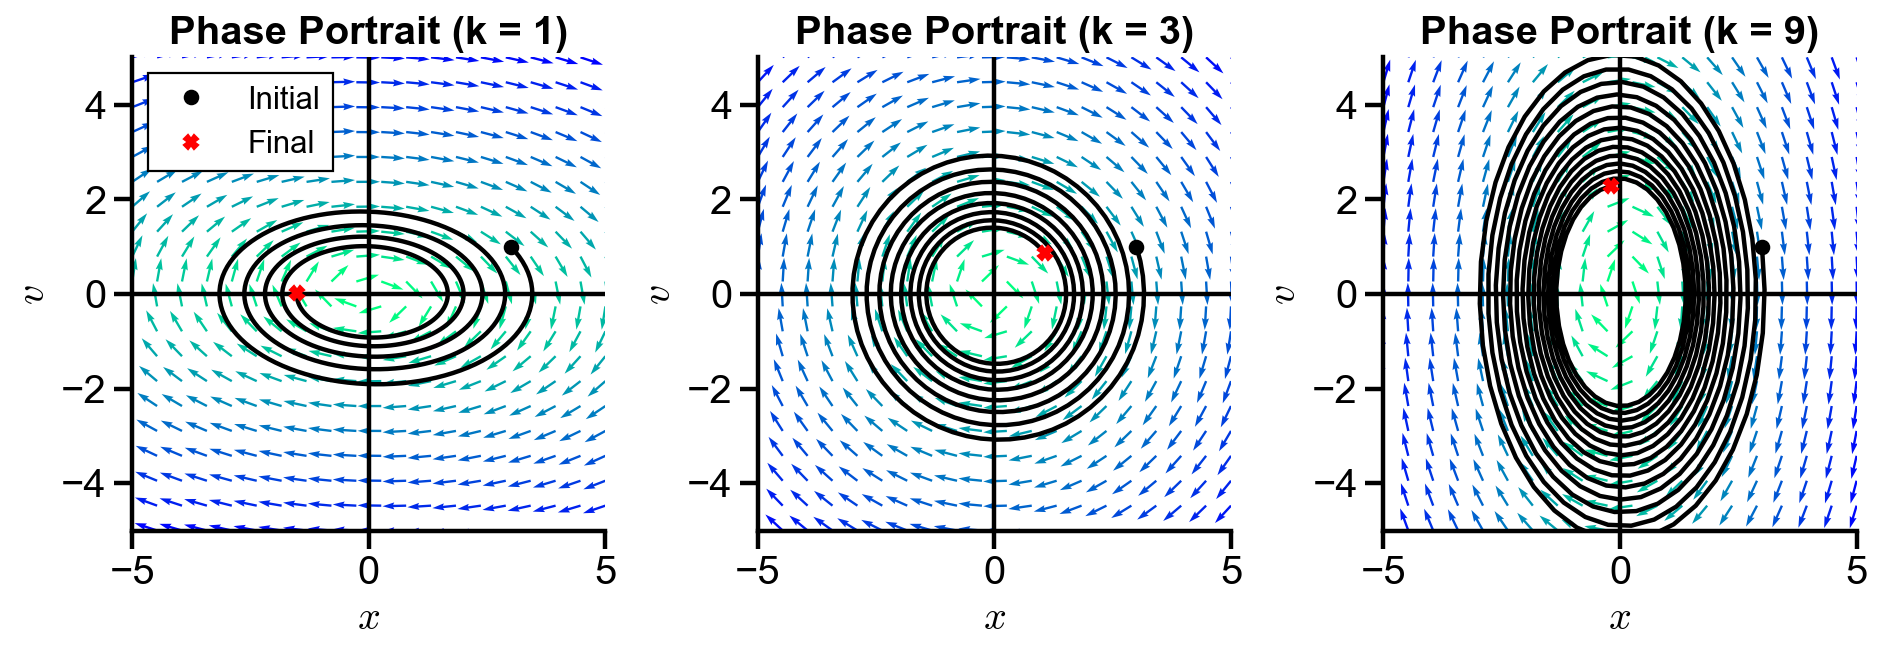

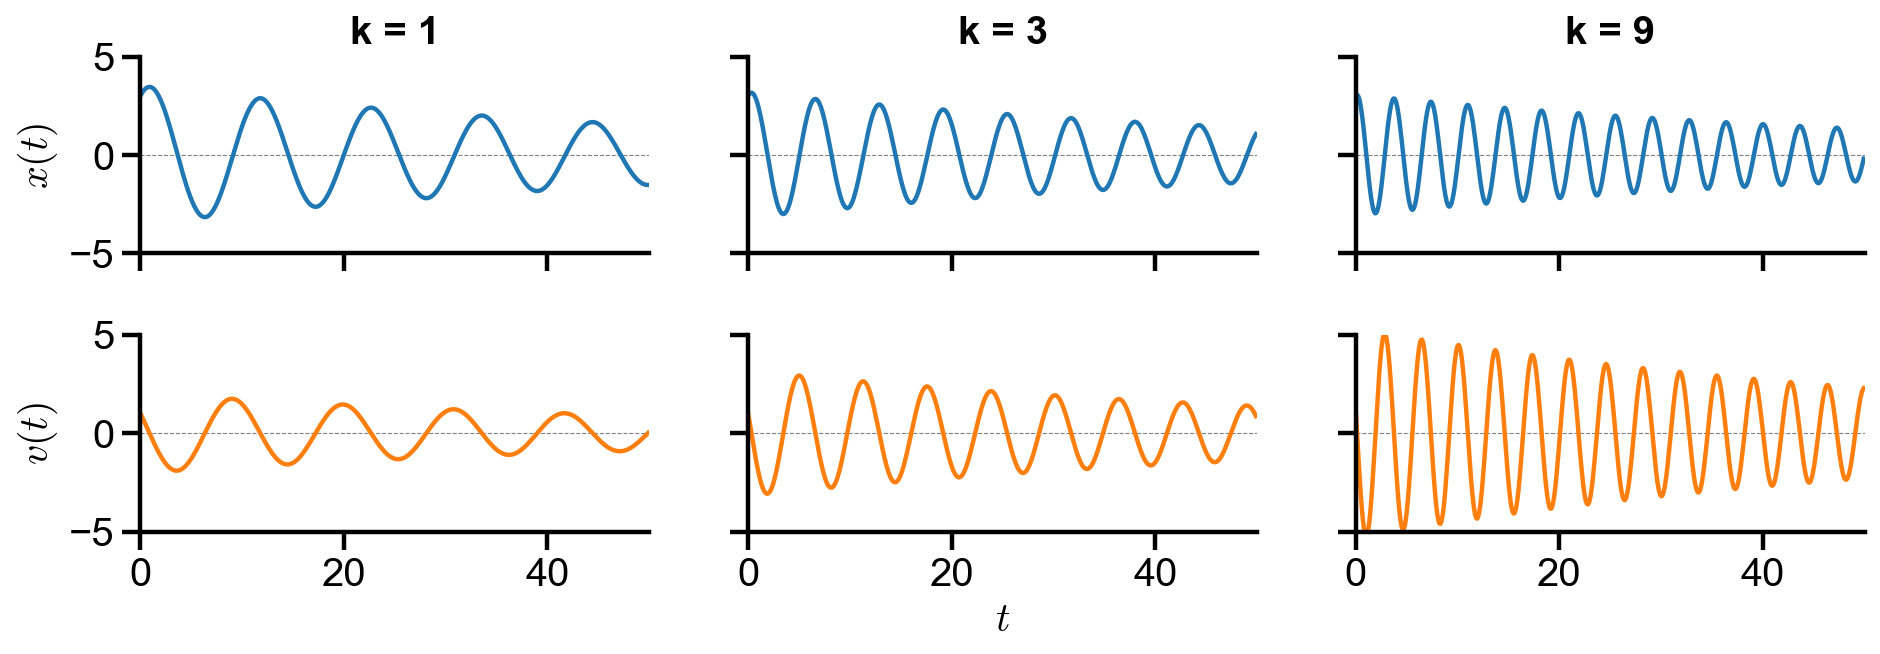

In [20]:
fig1, axs1 = plt.subplots(1, 3, figsize=(12, 4))
plt.tight_layout()
fig2, axs2 = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
plt.tight_layout()

for i in range(len(k)):
    # governing ode system
    dxdt = lambda x, v : v
    dvdt = lambda x, v : -k[i]/m*x - c/m*v
    ode_func = lambda t, z : np.array([dxdt(*z), dvdt(*z)])
    # ode soln
    ode_soln = scipy.integrate.solve_ivp(ode_func, [t_initial, t_final], initial_val, t_eval=t)
    # plot phase portrait
    scale = np.sqrt(dxdt(X, V)**2 + dvdt(X, V)**2)
    axs1[i].quiver(X, V, dxdt(X, V)/scale, dvdt(X, V)/scale, scale, cmap='winter_r', scale=20, width=0.005)
    axs1[i].plot(*initial_val, 'o', color='black', label='Initial')
    axs1[i].plot(ode_soln.y[0], ode_soln.y[1], color='black')
    axs1[i].plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
    # plot settings
    axs1[i].plot([-5, 5], [0, 0], color='black')
    axs1[i].plot([0, 0], [-5, 5], color='black')
    axs1[i].set_xlim(-5, 5)
    axs1[i].set_ylim(-5, 5)
    axs1[i].set_xlabel('$x$')
    axs1[i].set_ylabel('$v$')
    axs1[i].set_title(f'Phase Portrait (k = {k[i]})')
    axs1[i].set_aspect(1.0/axs1[i].get_data_ratio())  # square aspect
    # plot pver time
    axs2[0, i].plot(t, ode_soln.y[0], label='$x(t)$')
    axs2[1, i].plot(t, ode_soln.y[1], color='tab:orange', label='$v(t)$')
    axs2[1, 1].set_xlabel('$t$')
    axs2[0, 0].set_ylabel('$x(t)$')
    axs2[1, 0].set_ylabel('$v(t)$')
    axs2[0, i].set_title(f'k = {k[i]}')
    # plot settings
    for j in range(2):
        axs2[j, i].plot([0, 50], [0, 0], '--', color='grey', lw=0.5, zorder=0)
        # # plot settings
        axs2[j, i].set_xlim(0, 50)
        axs2[j, i].set_ylim(-5, 5)

axs1[0].legend(loc='upper left')

▲ The figure above shows the behavior of the system with changing spring constant $k$.

All trajectories spirals into the origin. As $k$ increases, the range of position decreases (insignificantly), and the range of velocity increases. The frequency increases as $k$ increases. Both position and velocity oscillates sinusoidally with damping over time.

### Changing mass $m$

In [21]:
# physical params
m = np.array([1, 3, 9])
k = 3
c = 0.1

In [22]:
# initial conditions
x0 = 3
v0 = 1
initial_val = [x0, v0]

In [23]:
# time array
t_initial = 0
t_final = 50
dt = 0.1
t = np.arange(t_initial, t_final, dt)

In [24]:
# quiver grid
xvec = np.linspace(-5, 5, 20)
vvec = np.linspace(-5, 5, 20)
X, V = np.meshgrid(xvec, vvec)

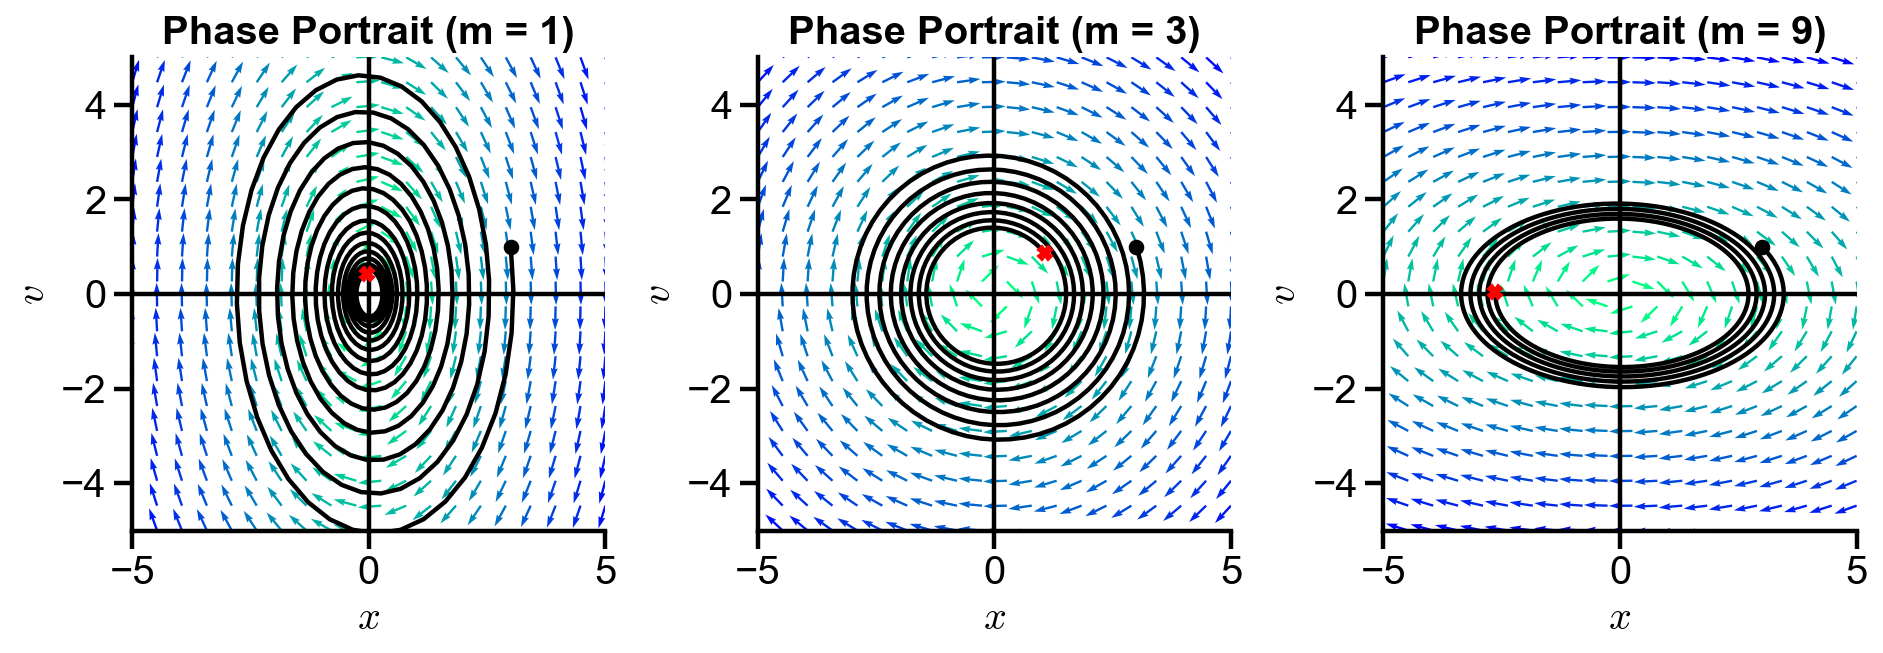

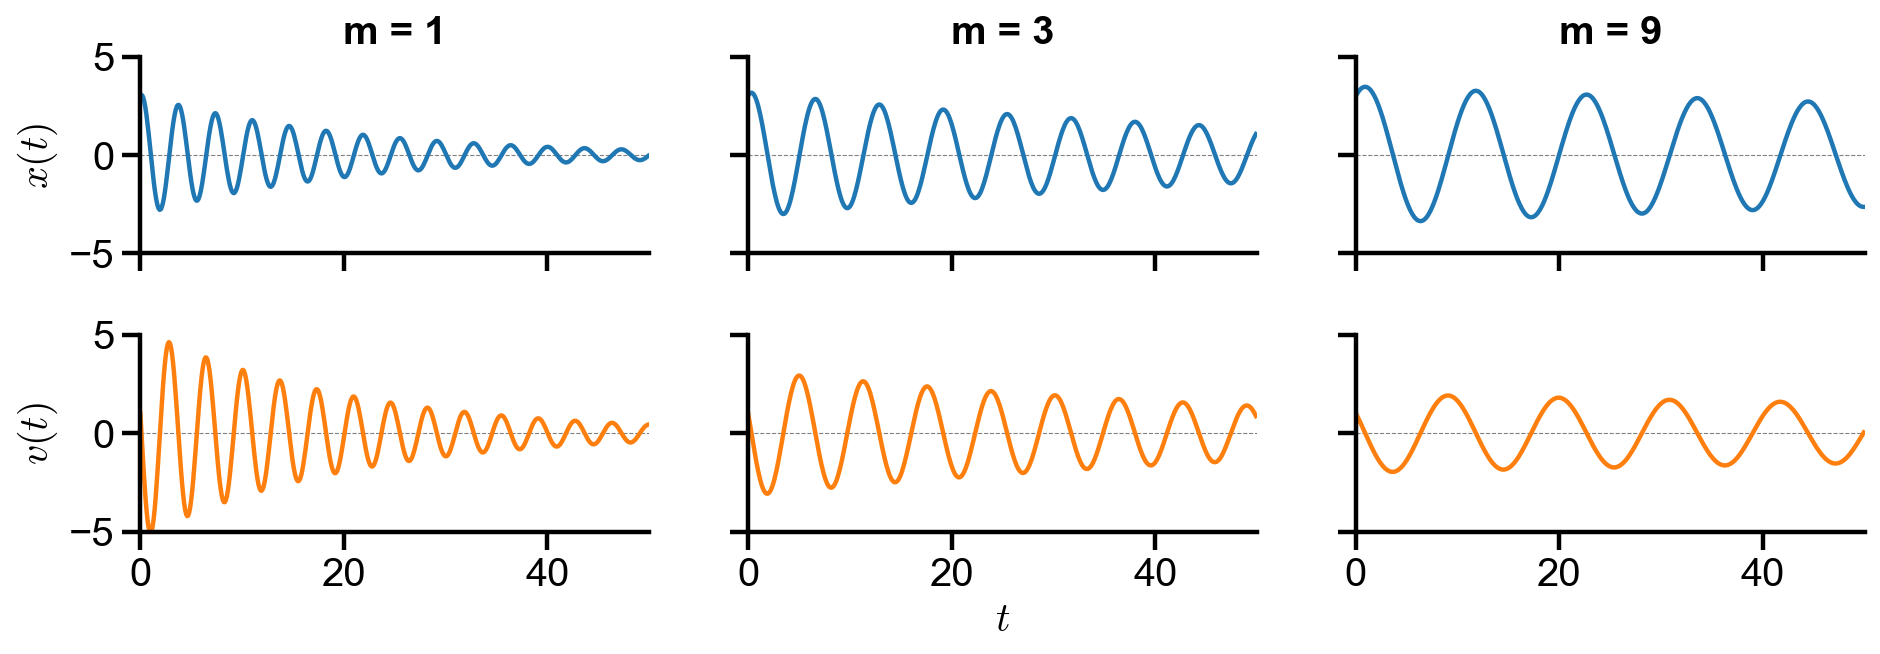

In [25]:
fig1, axs1 = plt.subplots(1, 3, figsize=(12, 4))
plt.tight_layout()
fig2, axs2 = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
plt.tight_layout()

for i in range(len(m)):
    # governing ode system
    dxdt = lambda x, v : v
    dvdt = lambda x, v : -k/m[i]*x - c/m[i]*v
    ode_func = lambda t, z : np.array([dxdt(*z), dvdt(*z)])
    # ode soln
    ode_soln = scipy.integrate.solve_ivp(ode_func, [t_initial, t_final], initial_val, t_eval=t)
    # plot phase portrait
    scale = np.sqrt(dxdt(X, V)**2 + dvdt(X, V)**2)
    axs1[i].quiver(X, V, dxdt(X, V)/scale, dvdt(X, V)/scale, scale, cmap='winter_r', scale=20, width=0.005)
    axs1[i].plot(*initial_val, 'o', color='black', label='Initial')
    axs1[i].plot(ode_soln.y[0], ode_soln.y[1], color='black')
    axs1[i].plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
    # plot settings
    axs1[i].plot([-5, 5], [0, 0], color='black')
    axs1[i].plot([0, 0], [-5, 5], color='black')
    axs1[i].set_xlim(-5, 5)
    axs1[i].set_ylim(-5, 5)
    axs1[i].set_xlabel('$x$')
    axs1[i].set_ylabel('$v$')
    axs1[i].set_title(f'Phase Portrait (m = {m[i]})')
    axs1[i].set_aspect(1.0/axs1[i].get_data_ratio())  # square aspect
    # plot pver time
    axs2[0, i].plot(t, ode_soln.y[0], label='$x(t)$')
    axs2[1, i].plot(t, ode_soln.y[1], color='tab:orange', label='$v(t)$')
    axs2[1, 1].set_xlabel('$t$')
    axs2[0, 0].set_ylabel('$x(t)$')
    axs2[1, 0].set_ylabel('$v(t)$')
    axs2[0, i].set_title(f'm = {m[i]}')
    # plot settings
    for j in range(2):
        axs2[j, i].plot([0, 50], [0, 0], '--', color='grey', lw=0.5, zorder=0)
        # # plot settings
        axs2[j, i].set_xlim(0, 50)
        axs2[j, i].set_ylim(-5, 5)

axs[-1].legend(loc='upper right')

▲ The figure above shows the behavior of the system with changing mass $m$.

All trajectories spirals into the origin. Both position and velocity oscillates sinusoidally with damping over time. As $m$ increases, the range of velocity decreases. The damping and frequency decreases as $m$ increases.